In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
demographic_data = "Resources/Demographic.csv"
house_price_index = "Resources/House_Prices.csv"
interest_rates = "Resources/Interest_Rates.csv"

# Specify the encoding parameter when reading CSV files
demographic_df = pd.DataFrame(pd.read_csv(demographic_data, encoding='latin-1'))
house_price_index_df = pd.DataFrame(pd.read_csv(house_price_index, encoding='latin-1'))
interest_rates_df = pd.DataFrame(pd.read_csv(interest_rates, encoding='latin-1'))


In [11]:
#Filter house_price_index_df for five year HPI and "House and Land" type
hpi_df_toronto = house_price_index_df.loc[(house_price_index_df["GEO"]=="Toronto, Ontario") 
                                          & (house_price_index_df["New housing price indexes"].str.contains("Total"))]
hpi_df_toronto

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
57,2019-01-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,103.0,NaN,NaN,NaN,1
177,2019-02-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,103.0,NaN,NaN,NaN,1
297,2019-03-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,103.0,NaN,NaN,NaN,1
417,2019-04-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.9,NaN,NaN,NaN,1
537,2019-05-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.6,NaN,NaN,NaN,1
657,2019-06-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.6,NaN,NaN,NaN,1
777,2019-07-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.0,NaN,NaN,NaN,1
897,2019-08-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.0,NaN,NaN,NaN,1
1017,2019-09-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.3,NaN,NaN,NaN,1
1137,2019-10-01,"Toronto, Ontario",2011S0503535,Total (house and land),"Index, 201612=100",347,units,0,v111955499,20.1,102.4,NaN,NaN,NaN,1


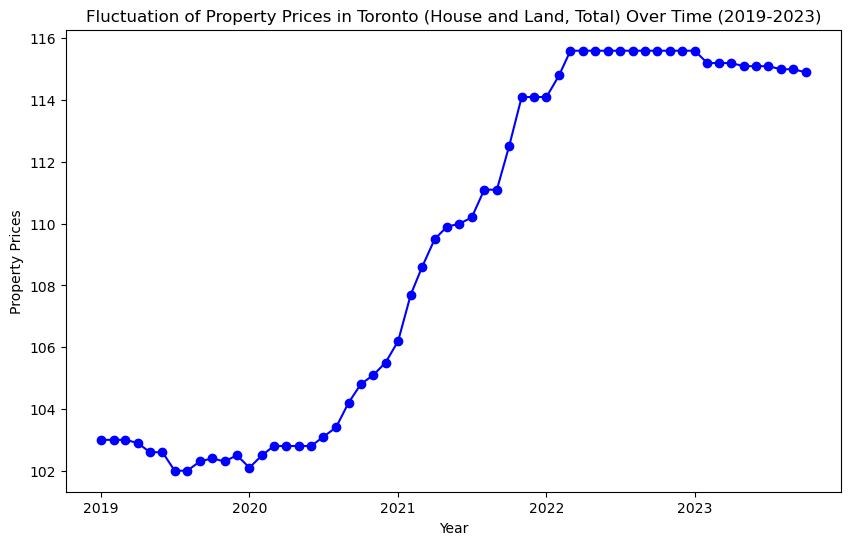

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the 'REF_DATE' column represents the years and 'VALUE' column represents property prices
# Modify these column names accordingly based on your dataset
hpi_df_toronto['REF_DATE'] = pd.to_datetime(hpi_df_toronto['REF_DATE'])

# Extract numerical representation of datetime (e.g., days since the start date)
hpi_df_toronto['days_since_start'] = (hpi_df_toronto['REF_DATE'] - hpi_df_toronto['REF_DATE'].min()).dt.days

# Filter data for the desired range (2010 to 2023)
start_date = '2010-01-01'
end_date = '2023-10-01'
filtered_data = hpi_df_toronto[(hpi_df_toronto['REF_DATE'] >= start_date) & (hpi_df_toronto['REF_DATE'] <= end_date)].copy()

# Extract features (X) and target variable (y)
X = filtered_data['days_since_start'].values.reshape(-1, 1)
y = filtered_data['VALUE'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the linear regression line
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# First subplot for property prices
ax1.scatter(X_test, y_test, color='black', label='Actual Data')
ax1.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression Model')
ax1.set_title('Linear Regression Model for Property Prices')
ax1.set_xlabel('Days Since Start Date')
ax1.set_ylabel('Property Prices')
ax1.legend()

# Convert 'ï»¿REF_DATE' column to datetime format with a custom format
interest_rates_df['ï»¿REF_DATE'] = pd.to_datetime(interest_rates_df['ï»¿REF_DATE'], format='%b-%y', errors='coerce')

# Filter data for the desired range (Jan-19 to Oct-23)
start_date_interest = '2019-01-01'
end_date_interest = '2023-10-31'
filtered_interest_data = interest_rates_df[(interest_rates_df['ï»¿REF_DATE'] >= start_date_interest) & (interest_rates_df['ï»¿REF_DATE'] <= end_date_interest)].copy()

# Extract filtered x and y values
x_values_interest_filtered = filtered_interest_data['ï»¿REF_DATE'].dt.strftime('%b-%y')
y_values_interest_filtered = filtered_interest_data['VALUE']

# Second subplot for mortgage rates
ax2.plot(x_values_interest_filtered, y_values_interest_filtered, marker='o', linestyle='-', color='r')
ax2.set_title('Fluctuation of Mortgage Rates Over Time (Jan-19 to Oct-23)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Mortgage Rates')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [159]:
print(interest_rates_df.columns)

Index(['ï»¿REF_DATE', 'GEO', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR',
       'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL',
       'TERMINATED', 'DECIMALS'],
      dtype='object')


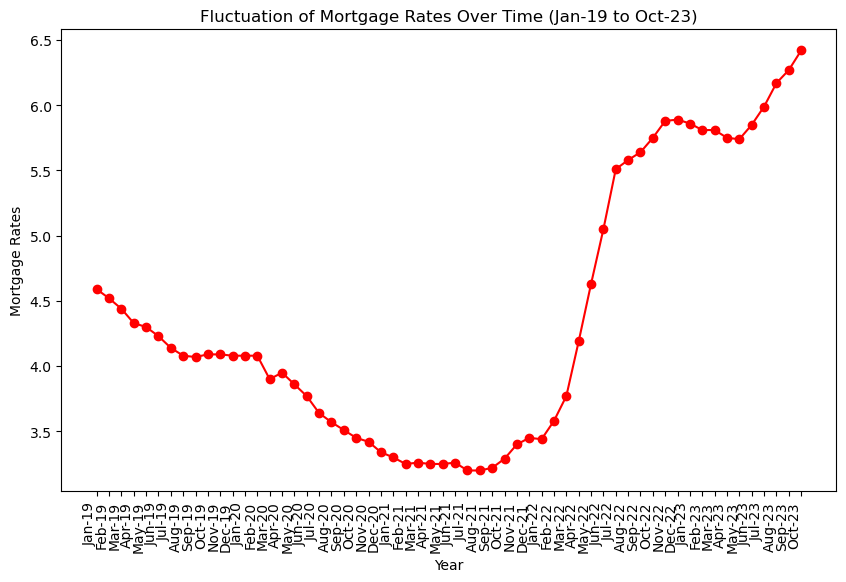

In [43]:


# Assuming the 'ï»¿REF_DATE' column represents the dates and 'VALUE' column represents mortgage rates
# Modify these column names accordingly based on your dataset

# Convert 'ï»¿REF_DATE' column to datetime format with a custom format
# Convert 'ï»¿REF_DATE' column to datetime format with a custom format
interest_rates_df['ï»¿REF_DATE'] = pd.to_datetime(interest_rates_df['ï»¿REF_DATE'], format='%b-%y', errors='coerce')

# Filter data for the desired range (Jan-19 to Oct-23)
start_date = '2019-01-01'
end_date = '2023-10-31'
filtered_interest_data = interest_rates_df[(interest_rates_df['ï»¿REF_DATE'] >= start_date) & (interest_rates_df['ï»¿REF_DATE'] <= end_date)].copy()


# Extract filtered x and y values
x_values_interest_filtered = filtered_interest_data['ï»¿REF_DATE'].dt.strftime('%b-%y')
y_values_interest_filtered = filtered_interest_data['VALUE']

# Plotting the line graph for mortgage rates
plt.figure(figsize=(10, 6))
plt.plot(x_values_interest_filtered, y_values_interest_filtered, marker='o', linestyle='-', color='r')

# Adding labels and title for mortgage rates
plt.title('Fluctuation of Mortgage Rates Over Time (Jan-19 to Oct-23)')
plt.xlabel('Year')
plt.ylabel('Mortgage Rates')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')

# Display the line graph
plt.savefig('flactuation_mortgage_rate.png')
plt.show()


# Impact of housing price on home ownership for people under 30

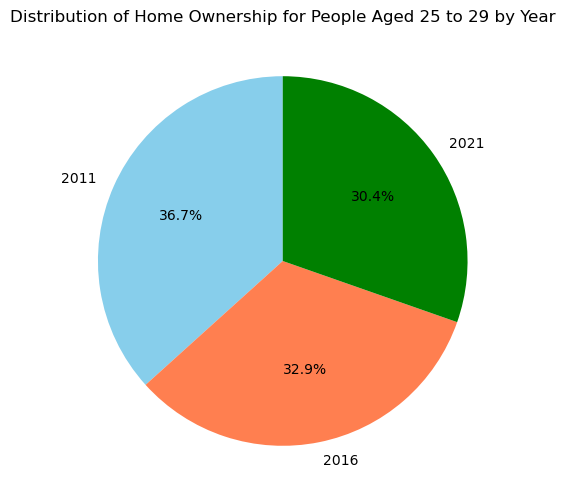

In [121]:
# Data
labels = ['2011', '2016', '2021']
values = [44.1, 39.6, 36.5]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral', 'green'])
plt.title('Distribution of Home Ownership for People Aged 25 to 29 by Year')
plt.show()

In [35]:
#For understanding impact of housing price on home ownership for people under 30 we created pie chart
#demographic_df = pd.read_csv(demographic_data, encoding='latin-1')

# Strip leading and trailing whitespaces from column names. We have column name "Age group" with white space and 
#it gives error and we strip leading and trailing whitespace
demographic_df.columns = demographic_df.columns.str.strip()

# Display the columns to verify the names
print(demographic_df.columns)

Index(['ï»¿Age Group', '2011', '2016', '2021'], dtype='object')


In [36]:
# Extracting data for people under 30 (25 to 29 years) from the demographic data
under_30_data = demographic_df[demographic_df['ï»¿Age Group'] == '25 to 29 years']

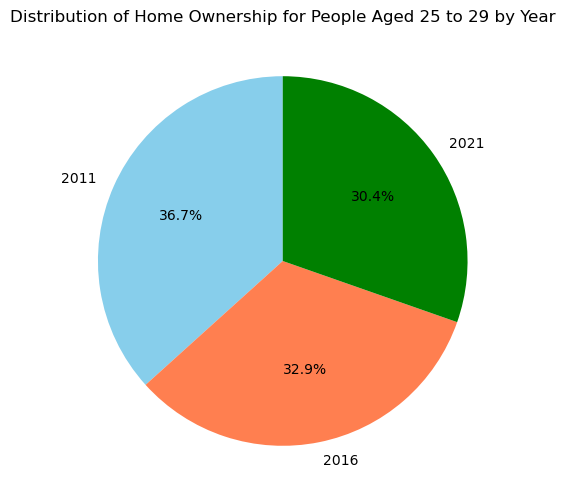

In [42]:
# Strip leading and trailing whitespaces from column names
demographic_df.columns = demographic_df.columns.str.strip()

# Extract data for people aged 25 to 29 years
age_25_29_data = demographic_df[demographic_df['ï»¿Age Group'] == '25 to 29 years']

# Extract corresponding house ownership data for the years 2011, 2016, and 2021
ownership_data = age_25_29_data[['2011', '2016', '2021']].iloc[0]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(ownership_data, labels=ownership_data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral', 'green'])
plt.title('Distribution of Home Ownership for People Aged 25 to 29 by Year')
plt.show()


In [38]:
# Strip leading and trailing whitespaces from column names. We have column name "Age group" with white space and 
#it gives error and we strip leading and trailing whitespace
demographic_df.columns = demographic_df.columns.str.strip()

# Display the columns to verify the names
print(demographic_df.columns)


Index(['ï»¿Age Group', '2011', '2016', '2021'], dtype='object')


In [39]:
# Extracting data for people under 30 (25 to 29 years) from the demographic data
under_30_data = demographic_df[demographic_df['ï»¿Age Group'] == '25 to 29 years']


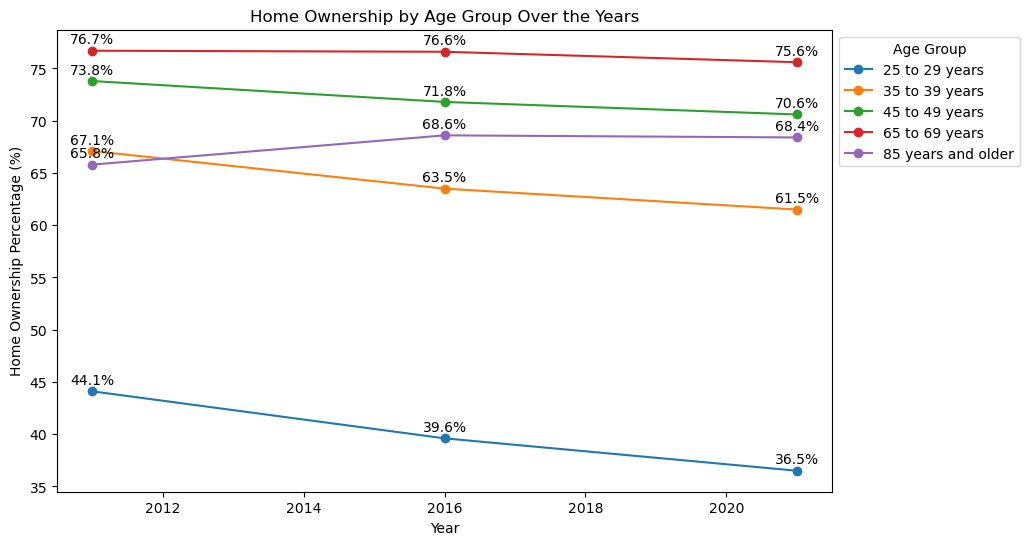

In [40]:
# Strip leading and trailing whitespaces from column names
demographic_df.columns = demographic_df.columns.str.strip()

# Extracting relevant columns for the specified age groups
age_groups_data = demographic_df[
    (demographic_df['ï»¿Age Group'] == '25 to 29 years') |
    (demographic_df['ï»¿Age Group'] == '35 to 39 years') |
    (demographic_df['ï»¿Age Group'] == '45 to 49 years') |
    (demographic_df['ï»¿Age Group'] == '65 to 69 years') |
    (demographic_df['ï»¿Age Group'] == '85 years and older')
]

# Set the 'ï»¿Age Group' column as the index
age_groups_data.set_index('ï»¿Age Group', inplace=True)

# Convert 'Year' values to numeric
age_groups_data.columns = age_groups_data.columns.astype(int)

# Transposing the DataFrame and plotting a line graph
ax = age_groups_data.T.plot(kind='line', marker='o', figsize=(10, 6))

# Add data labels to each point on the lines
for age_group in age_groups_data.index:
    for year in age_groups_data.columns:
        value = age_groups_data.loc[age_group, year]
        ax.annotate(f'{value:.1f}%', (year, value), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Home Ownership by Age Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Home Ownership Percentage (%)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
# Save the plot to a file (e.g., PNG format)
plt.savefig('home_ownership_by_age_group_line.png')
plt.show()

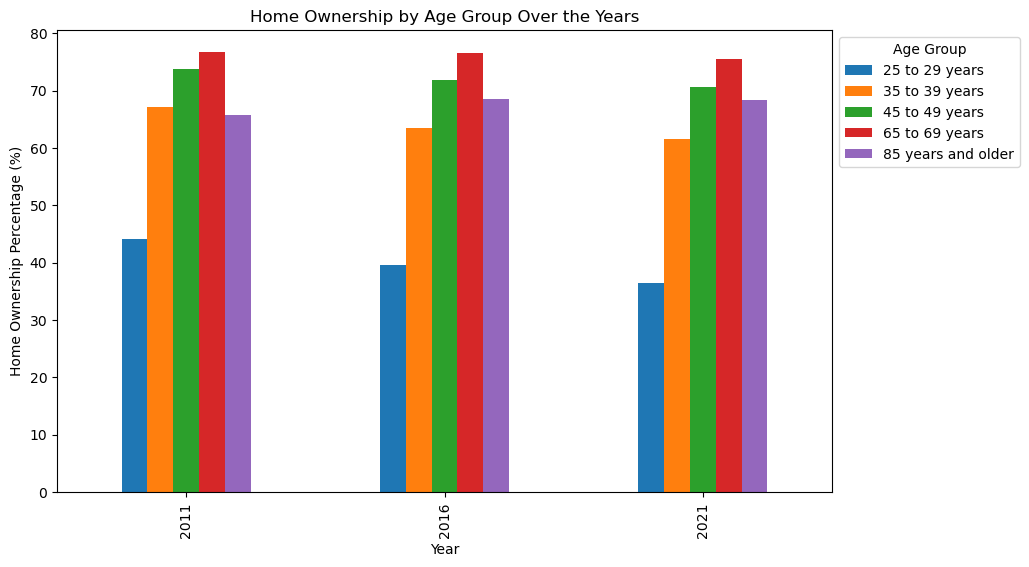

In [41]:
# Load the demographic data from the CSV file with explicit encoding
demographic_data = "Resources/Demographic.csv"
demographic_df = pd.read_csv(demographic_data, encoding='latin-1')

# Strip leading and trailing whitespaces from column names
demographic_df.columns = demographic_df.columns.str.strip()

# Extracting relevant columns for the specified age groups
age_groups_data = demographic_df[
    (demographic_df['ï»¿Age Group'] == '25 to 29 years') | 
    (demographic_df['ï»¿Age Group'] == '35 to 39 years') | 
    (demographic_df['ï»¿Age Group'] == '45 to 49 years') |
    (demographic_df['ï»¿Age Group'] == '65 to 69 years') |
    (demographic_df['ï»¿Age Group'] == '85 years and older')
]

# Set the 'Age Group' column as the index
age_groups_data.set_index('ï»¿Age Group', inplace=True)

# Transposing the DataFrame and plotting a bar chart
age_groups_data.T.plot(kind='bar', figsize=(10, 6))
plt.title('Home Ownership by Age Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Home Ownership Percentage (%)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))

# Save the plot to a file (e.g., PNG format)
plt.savefig('home_ownership_by_age_group.png')

# Show the plot
plt.show()
